### Download features file and Dataset.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
from features import load_dataset
from sklearn.ensemble import IsolationForest
import argparse
import pickle
from features import quantify_image
import cv2
from google.colab.patches import cv2_imshow

#  Load Data

In [ ]:
save_model = 'anomaly.model'
dataset ='/Image Anomaly'
curr_dir=dataset
print(dataset)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Image Anomaly


#Train Model with IOF algorithm

In [ ]:
data = load_dataset(dataset, bins=(3, 3, 3))
model = IsolationForest(n_estimators=100, contamination=0.01,random_state=42)
model.fit(data)



[INFO] preparing dataset...
[INFO] fitting anomaly detection model...


IsolationForest(contamination=0.01, random_state=42)

# Test Model

In [ ]:
f = open(save_model, "wb")
f.write(pickle.dumps(model))
f.close()

model = 'anomaly.model'
img_path = "/forest_for142.jpg" #image address for evaluation

model_path = open('anomaly.model', 'rb')
model = pickle.loads(model_path.read())

/content/forest_for142.jpg
loading anomaly detection model...


(27,)
1


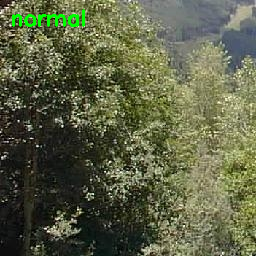

In [ ]:
image = cv2.imread(img_path)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
features = quantify_image(hsv, bins=(3, 3, 3))
print(features.shape)
preds = model.predict([features])[0]
label = "anomaly" if preds == -1 else "normal"

#Anomaly shown in red , normal shown in green
color = (0, 0, 255) if preds == -1 else (0, 255, 0)
# draw the predicted label text on the original image
cv2.putText(image, label, (10,  25), cv2.FONT_HERSHEY_SIMPLEX,
  0.7, color, 2)
cv2_imshow(image)
cv2.waitKey(0)